# Capstone project for ZAI ORTIZ

![Course Hero](images/hero.png)

## Introduction

The project I chose will examine whether or not we are approaching a recession. It will examine past recession data to determine whether or not the same patterns are present in those economies today. 

The questions this project will answer are the following:
 
 *Will there be a recession in the next year?*

## Data Set Selection

This project contains the following dependencies:
1. Common recession indicators and models
2. Past recession data 
3. Today's data to compare to the past
4. Predictive analysis to compare today's trends to past trends 

To complete this project I will use the following databases: 
1. [Federal Reserve Bank of New York](https://www.newyorkfed.org/research/capital_markets/ycfaq#/overview)
2. [Fred Economic Data](https://fred.stlouisfed.org/)

The steps I will take to complete this project are the following: 
1. Generate a hypothesis
2. Use the Yield Curve Model
3. Find data to perform a Yield Curve Model analysis
4. Examine the data
5. Perform the analysis
6. Confirm whether or not the hypothesis was correct
7. Report findings

## Data Examination

Let's start with the imports for the notebook.

Note: Remember to add in the `requirements.txt` file all the modules you use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Get the selected data set into a pandas Dataframe.

Note: You need to add the right method to load the data.

In [3]:
df = pd.read_clipboard()

In [38]:
import pandas as pd

treasury_data = pd.read_csv("file:///Users/zaira.ortiz/Downloads/allmonth (1) - rec_prob.csv")

Find relevant information about the selected dataset.

- How many rows and columns does it has?
- Which characteristics does each column has?
    - Data type
    - Minimum and maximum values
    - Values distribution
    - Missing data
- Which columns are related or are dependent on each other? 
    - Which ones can be derived?
    - Which are good candidates for an hypothesis?

Note: Use pandas methods as shape, head, sample, groupby, describe and any other you can think of!

How many rows and columns does the data have?

In [14]:
print("Shape: ", treasury_data.shape)

Shape:  (775, 7)


What are the data types?

In [15]:
treasury_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date                                            775 non-null    object 
 1   10 Year Treasury Yield                          763 non-null    float64
 2   3 Month Treasury Yield                          763 non-null    float64
 3   3 Month Treasury Yield (Bond Equivalent Basis)  763 non-null    float64
 4   Spread                                          763 non-null    float64
 5   Rec_prob                                        763 non-null    object 
 6   NBER_Rec                                        763 non-null    float64
dtypes: float64(5), object(2)
memory usage: 127.3 KB


What are the Minimum and Maximum Values?

In [16]:
treasury_data.max(axis=0)

/var/folders/6b/74jkm5q95jvd370m9npx8vch0000gn/T/ipykernel_24988/3667023145.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  treasury_data.max(axis=0)


Date                                              9/30/2022
10 Year Treasury Yield                                15.32
3 Month Treasury Yield                                 16.3
3 Month Treasury Yield (Bond Equivalent Basis)        17.24
Spread                                                 4.15
NBER_Rec                                                1.0
dtype: object

In [17]:
treasury_data.min(axis=0)

/var/folders/6b/74jkm5q95jvd370m9npx8vch0000gn/T/ipykernel_24988/1375914326.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  treasury_data.min(axis=0)


Date                                              1/31/2018
10 Year Treasury Yield                                 0.62
3 Month Treasury Yield                                 0.01
3 Month Treasury Yield (Bond Equivalent Basis)         0.01
Spread                                                -3.51
NBER_Rec                                                0.0
dtype: object

Values Distribution

In [18]:
treasury_data.describe()

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,NBER_Rec
count,763.000000,763.000000,763.000000,763.000000,763.000000
mean,5.836081,4.347575,4.483552,1.352529,0.124509
std,2.945843,3.179119,3.317027,1.245848,0.330377
min,0.620000,0.010000,0.010000,-3.510000,0.000000
25%,3.890000,1.865000,1.895000,0.480000,0.000000
50%,5.500000,4.430000,4.540000,1.400000,0.000000
75%,7.540000,6.010000,6.190000,2.350000,0.000000
max,15.320000,16.300000,17.240000,4.150000,1.000000


In [19]:
treasury_data.describe(include="object")

,Date,Rec_prob
count,775,763
unique,775,646
top,31-Jan-59,0.21%
freq,1,6


Missing data

In [20]:
print (treasury_data.isnull().sum(axis=0))

Date                                               0
10 Year Treasury Yield                            12
3 Month Treasury Yield                            12
3 Month Treasury Yield (Bond Equivalent Basis)    12
Spread                                            12
Rec_prob                                          12
NBER_Rec                                          12
dtype: int64


Which columns are related or independent of each other?

Which can be derived?

Which are good candidates for a hypothesis?

## Define the Hypothesis to test

Decide what is your project about.

What do you want to predict?

I want to predict whether or not there will be a recession in the next 12 months. My hypothesis is yes.

## Clean the data

Create a new Data Frame just with the data you are going to use

In [39]:
yield_data = treasury_data[["10 Year Treasury Yield", "3 Month Treasury Yield (Bond Equivalent Basis)", "Spread"]].copy()

## Run your experiment(s)

Describe what your experiment is done, and execute it.

Note: Be generous with your plots!

In [23]:
print("Shape: ", yield_data.shape)
print("Info:")
yield_data.info(memory_usage="deep")
print("Head:")
yield_data.head()

Shape:  (775, 3)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 3 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   10 Year Treasury Yield                          763 non-null    float64
 1   3 Month Treasury Yield (Bond Equivalent Basis)  763 non-null    float64
 2   Spread                                          763 non-null    float64
dtypes: float64(3)
memory usage: 18.3 KB
Head:


,10 Year Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread
0,4.02,2.88,1.14
1,3.96,2.76,1.20
2,3.99,2.86,1.13
3,4.12,3.01,1.11
4,4.31,2.90,1.41


In [24]:
yield_data.describe()

,10 Year Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread
count,763.000000,763.000000,763.000000
mean,5.836081,4.483552,1.352529
std,2.945843,3.317027,1.245848
min,0.620000,0.010000,-3.510000
25%,3.890000,1.895000,0.480000
50%,5.500000,4.540000,1.400000
75%,7.540000,6.190000,2.350000
max,15.320000,17.240000,4.150000


In [26]:
print (yield_data.isnull().sum(axis=0))

10 Year Treasury Yield                            12
3 Month Treasury Yield (Bond Equivalent Basis)    12
Spread                                            12
dtype: int64


In [28]:
yield_data.dropna(subset=["10 Year Treasury Yield"], inplace=True)
print (yield_data.isnull().sum(axis=0))

10 Year Treasury Yield                            0
3 Month Treasury Yield (Bond Equivalent Basis)    0
Spread                                            0
dtype: int64


In [29]:
yield_data.describe(include="all")

,10 Year Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread
count,763.000000,763.000000,763.000000
mean,5.836081,4.483552,1.352529
std,2.945843,3.317027,1.245848
min,0.620000,0.010000,-3.510000
25%,3.890000,1.895000,0.480000
50%,5.500000,4.540000,1.400000
75%,7.540000,6.190000,2.350000
max,15.320000,17.240000,4.150000


In [32]:
yield_data.head(20)

,10 Year Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread
0,4.02,2.88,1.14
1,3.96,2.76,1.20
2,3.99,2.86,1.13
3,4.12,3.01,1.11
4,4.31,2.90,1.41
5,4.34,3.28,1.06
6,4.40,3.27,1.13
7,4.43,3.46,0.97
8,4.68,4.14,0.54
9,4.53,4.15,0.38


In [42]:
df2 = treasury_data.iloc[644:764]

In [43]:
print (df2)

          Date  10 Year Treasury Yield  3 Month Treasury Yield  \
644  30-Sep-12                    1.72                    0.11   
645  31-Oct-12                    1.75                    0.10   
646  30-Nov-12                    1.65                    0.09   
647  31-Dec-12                    1.72                    0.07   
648  31-Jan-13                    1.91                    0.07   
..         ...                     ...                     ...   
759  4/30/2022                    2.75                    0.76   
760  5/31/2022                    2.90                    0.98   
761  6/30/2022                    3.14                    1.49   
762  7/31/2022                    2.90                    2.23   
763  8/31/2022                     NaN                     NaN   

     3 Month Treasury Yield (Bond Equivalent Basis)  Spread Rec_prob  NBER_Rec  
644                                            0.11    1.61    3.75%       0.0  
645                                          

In [44]:
plotme = yield_data.iloc[644:764]

In [45]:
print (plotme)

     10 Year Treasury Yield  3 Month Treasury Yield (Bond Equivalent Basis)  \
644                    1.72                                            0.11   
645                    1.75                                            0.10   
646                    1.65                                            0.09   
647                    1.72                                            0.07   
648                    1.91                                            0.07   
..                      ...                                             ...   
759                    2.75                                            0.77   
760                    2.90                                            1.00   
761                    3.14                                            1.52   
762                    2.90                                            2.27   
763                     NaN                                             NaN   

     Spread  
644    1.61  
645    1.65  
646    1.

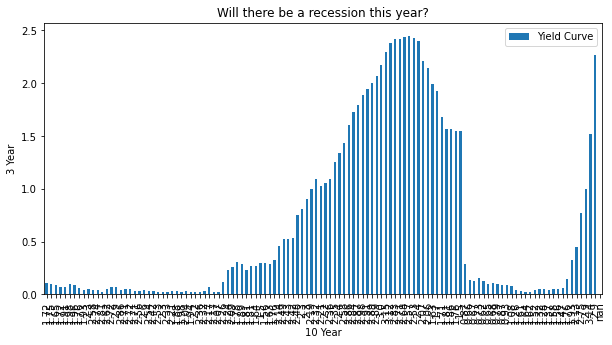

In [51]:
import matplotlib.pyplot as plt

data_plot = plotme.plot(
    x="10 Year Treasury Yield",
    y="3 Month Treasury Yield (Bond Equivalent Basis)",
    kind="bar",
    figsize=(10,5),
)
plt.xticks(rotation=90)
plt.title("Will there be a recession this year?")
plt.legend(["Yield Curve"])
plt.xlabel("10 Year")
plt.ylabel("3 Year")
plt.show()

In [52]:
import pandas as pd

by_date_data = pd.read_csv("file:///Users/zaira.ortiz/Downloads/DATEallmonth - rec_prob.csv")

In [53]:
print("Shape: ", by_date_data.shape)

Shape:  (775, 9)


In [54]:
by_date_data.describe()

,Day,Month,Year,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,NBER_Rec
count,775.000000,775.000000,775.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,30.415484,6.477419,1990.793548,5.836081,4.347575,4.483552,1.352529,0.124509
std,0.864319,3.452025,18.656661,2.945843,3.179119,3.317027,1.245848,0.330377
min,28.000000,1.000000,1959.000000,0.620000,0.010000,0.010000,-3.510000,0.000000
25%,30.000000,3.000000,1975.000000,3.890000,1.865000,1.895000,0.480000,0.000000
50%,31.000000,6.000000,1991.000000,5.500000,4.430000,4.540000,1.400000,0.000000
75%,31.000000,9.000000,2007.000000,7.540000,6.010000,6.190000,2.350000,0.000000
max,31.000000,12.000000,2023.000000,15.320000,16.300000,17.240000,4.150000,1.000000


In [60]:
by_date_data.dropna(subset=["10 Year Treasury Yield"], inplace=True)
print (yield_data.isnull().sum(axis=0))

10 Year Treasury Yield                            12
3 Month Treasury Yield (Bond Equivalent Basis)    12
Spread                                            12
dtype: int64


Confirm null values were dropped:

In [61]:
print("Shape: ", by_date_data.shape)

Shape:  (763, 9)


Yes, they were. Yay!

In [64]:
clean = by_date_data[["Year", "10 Year Treasury Yield", "3 Month Treasury Yield (Bond Equivalent Basis)", "Spread"]].copy()

In [65]:
print("Shape: ", clean.shape)

Shape:  (763, 4)


In [66]:
clean.describe()

,Year,10 Year Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread
count,763.000000,763.000000,763.000000,763.000000
mean,1990.293578,5.836081,4.483552,1.352529
std,18.368002,2.945843,3.317027,1.245848
min,1959.000000,0.620000,0.010000,-3.510000
25%,1974.000000,3.890000,1.895000,0.480000
50%,1990.000000,5.500000,4.540000,1.400000
75%,2006.000000,7.540000,6.190000,2.350000
max,2022.000000,15.320000,17.240000,4.150000


## Reach a conclusion

What was the result of your experiment?

How can it be improved?

Elaborate in one thing you learn during the capstone project.

## Congratulations

You have finished the bootcamp!

![Congratulations](images/congratulations.jpg)